In [2]:
import os
import pandas as pd
from pathlib import Path
import json
from pprint import pprint
from copy import deepcopy
import random
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
working_path = Path('/home/zhanj289/side_projects/cord_19/')

In [4]:
data_path = Path('/home/zhanj289/side_projects/cord_19/') / 'data'

In [4]:
## PMC JSON looks like having no 'abstract' key

In [5]:
## check meta data

meta_data = pd.read_csv(data_path/'metadata.csv')

In [6]:
meta_data[meta_data['abstract'].isnull()].head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
31,6iu1dtyl,6e8517cb25ff228cb48da90a9c97d9c274dc8031,PMC,The site of origin of the 1918 influenza pande...,10.1186/1479-5876-2-3,PMC340389,14733617.0,no-cc,NaN,2004-01-20,"Barry, John M",J Transl Med,NaN,NaN,NaN,document_parses/pdf_json/6e8517cb25ff228cb48da...,document_parses/pmc_json/PMC340389.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
35,1769ovyk,c5131e5f5c6000ec84139edc64778a6f1d391b83,PMC,8th Annual Toronto Critical Care Medicine Symp...,10.1186/cc2429,PMC420071,14975048.0,no-cc,NaN,2004-01-02,"Granton, Jeff; Granton, John",Crit Care,NaN,NaN,NaN,document_parses/pdf_json/c5131e5f5c6000ec84139...,document_parses/pmc_json/PMC420071.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,NaN
36,tixxm78q,8a7d5de5ea680e784ab2bd877240bf09e4c1c02d,PMC,Recently published papers: all the usual suspe...,10.1186/cc2449,PMC420074,14975037.0,no-cc,NaN,2004-01-02,"Ball, Jonathan",Crit Care,NaN,NaN,NaN,document_parses/pdf_json/8a7d5de5ea680e784ab2b...,document_parses/pmc_json/PMC420074.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,NaN
105,r8j6lhoc,c6c8b82bc5a800425b075540eff41b0af719f80f,PMC,HIV Epidemiology in Africa: Weak Variables and...,10.1371/journal.pmed.0020137,PMC1140948,15916469.0,cc-by,NaN,2005-05-31,"Brody, Stuart; Potterat, John J",PLoS Med,NaN,NaN,NaN,document_parses/pdf_json/c6c8b82bc5a800425b075...,document_parses/pmc_json/PMC1140948.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,NaN
133,az4a70b0,cc698ffabf545da2fd7ee6a5cb4f25d9102a856a,PMC,eCAM benefits from diversity that derives from...,10.1093/ecam/neh120,PMC1193560,16136204.0,no-cc,NaN,2005-09-01,"Cooper, Edwin L.",Evid Based Complement Alternat Med,NaN,NaN,NaN,document_parses/pdf_json/cc698ffabf545da2fd7ee...,document_parses/pmc_json/PMC1193560.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,NaN


In [69]:

# paper without pdf_json or pmc_json

len(meta_data[(meta_data['pdf_json_files'].isnull()) &(meta_data['pmc_json_files'].isnull()) ])

75786

In [70]:

# paper with pdf_json but no pmc_json

len(meta_data[(meta_data['pdf_json_files'].notnull()) &(meta_data['pmc_json_files'].isnull()) ])

16595

In [71]:

# paper with pmc_json bbut no pdj_json

len(meta_data[(meta_data['pdf_json_files'].isnull()) &(meta_data['pmc_json_files'].notnull()) ])

2819

In [72]:

# paper with pmc_json bbut no pdj_json

len(meta_data[(meta_data['pdf_json_files'].notnull()) &(meta_data['pmc_json_files'].notnull()) ])

45332

In [73]:
# paper has no abstract in metadata
meta_data_no_abstract  = meta_data[meta_data['abstract'].isnull()]

In [74]:
len(meta_data_no_abstract)

30914

In [75]:

# paper without pdf_json or pmc_json

len(meta_data_no_abstract[(meta_data_no_abstract['pdf_json_files'].isnull()) &(meta_data_no_abstract['pmc_json_files'].isnull()) ])

20142

In [76]:
## look closely at a paper without abstract bbut has pdf_json

meta_data_no_abstract[(meta_data_no_abstract['pdf_json_files'].notnull()) &(meta_data_no_abstract['pmc_json_files'].isnull()) ]['pdf_json_files'][224]

'document_parses/pdf_json/a037a1a6fe76f1c43e33a639231b9874cb655f88.json'

In [ ]:
# but it has abstraxt in json

In [67]:
test_file = json.load(open('data/document_parses/pdf_json/a037a1a6fe76f1c43e33a639231b9874cb655f88.json', 'rb'))

test_file['abstract']

### metadata seems cannot reflect whether we have abstract in the dataset

In [5]:
# The following function is used in creating
def format_name(author):
    middle_name = " ".join(author['middle'])
    
    if author['middle']:
        return " ".join([author['first'], middle_name, author['last']])
    else:
        return " ".join([author['first'], author['last']])


def format_affiliation(affiliation):
    text = []
    location = affiliation.get('location')
    if location:
        text.extend(list(affiliation['location'].values()))
    
    institution = affiliation.get('institution')
    if institution:
        text = [institution] + text
    return ", ".join(text)

def format_authors(authors, with_affiliation=False):
    name_ls = []
    
    for author in authors:
        name = format_name(author)
        if with_affiliation:
            affiliation = format_affiliation(author['affiliation'])
            if affiliation:
                name_ls.append(f"{name} ({affiliation})")
            else:
                name_ls.append(name)
        else:
            name_ls.append(name)
    
    return ", ".join(name_ls)

def format_body(body_text):
    texts = [(di['section'], di['text']) for di in body_text]
    texts_di = {di['section']: "" for di in body_text}
    
    for section, text in texts:
        texts_di[section] += text

    body = ""

    for section, text in texts_di.items():
        body += section
        body += " "
        body += text
        body += " "
    
    return body

def format_bib(bibs):
    if type(bibs) == dict:
        bibs = list(bibs.values())
    bibs = deepcopy(bibs)
    formatted = []
    
    for bib in bibs:
        bib['authors'] = format_authors(
            bib['authors'], 
            with_affiliation=False
        )
        formatted_ls = [str(bib[k]) for k in ['title', 'authors', 'venue', 'year']]
        formatted.append(", ".join(formatted_ls))

    return "; ".join(formatted)

In [6]:
def load_files(dirname, all_paper = False, paper_number = 1000):
    
    filenames = os.listdir(dirname)
    
    # load a few paper or all
    if all_paper == False:
        rand_indx = random.sample(range(0,len(filenames)), paper_number)
    else:
        rand_indx = list(range(0, len(filenames)))
    
    
    raw_files = []

    for i in tqdm(rand_indx):
        filename = dirname / filenames[i]
        file = json.load(open(filename, 'rb'))
        raw_files.append(file)
    
    return raw_files

def generate_clean_df(all_files):
    cleaned_files = []
    
    for file in tqdm(all_files):
        features = [
            file['paper_id'],
            file['metadata']['title'],
            format_authors(file['metadata']['authors']),
            format_authors(file['metadata']['authors'], 
                           with_affiliation=True),
            format_body(file['abstract']),
            format_body(file['body_text']),
            format_bib(file['bib_entries']),
            file['metadata']['authors'],
            file['bib_entries']
        ]

        cleaned_files.append(features)

    col_names = ['paper_id', 'title', 'authors',
                 'affiliations', 'abstract', 'text', 
                 'bibliography','raw_authors','raw_bibliography']

    clean_df = pd.DataFrame(cleaned_files, columns=col_names)
    clean_df.head()
    
    return clean_df

### load and clean data

In [7]:
pdf_path = data_path / 'document_parses'/'pdf_json/'

# check size of data
filenames = os.listdir(pdf_path)
print("Number of articles retrieved from pdf:", len(filenames))

Number of articles retrieved from pdf: 65782


In [8]:
# attach all pdf to a list
all_files = load_files(pdf_path, all_paper = True)

In [15]:
# some data exploration

file = all_files[555]
print("Dictionary keys:", file.keys())

Dictionary keys: dict_keys(['paper_id', 'metadata', 'abstract', 'body_text', 'bib_entries', 'ref_entries', 'back_matter'])


In [16]:
for i in range(len(file['body_text'])):
    pprint(file['body_text'][i]['section'])

'Background'
'Methods'
'Methods'
'Methods'
'Methods'
'Methods'
'Methods'
'Patient characteristics'
'Patient characteristics'
'Patient characteristics'
'Outcomes'
'Outcomes'
'Outcomes'
'Treatment'
'Discussion'
'Discussion'
'Discussion'
'Discussion'
'Discussion'
'Conclusions'
'Additional file'
'Additional file'
'Competing interests'
'Competing interests'


In [9]:
## Generate CSV (PDF JSON)


cleaned_files = []

for file in tqdm(all_files):
    features = [
        file['paper_id'],
        file['metadata']['title'],
        format_authors(file['metadata']['authors']),
        format_authors(file['metadata']['authors'], 
                       with_affiliation=True),
        format_body(file['abstract']),
        format_body(file['body_text']),
        format_bib(file['bib_entries']),
        file['metadata']['authors'],
        file['bib_entries']
    ]
    
    cleaned_files.append(features)

In [10]:
## create cleaned pdf
col_names = [
    'paper_id', 
    'title', 
    'authors',
    'affiliations', 
    'abstract', 
    'text', 
    'bibliography',
    'raw_authors',
    'raw_bibliography'
]

paper_df = pd.DataFrame(cleaned_files, columns=col_names)


In [13]:
paper_df.shape

(65782, 9)

In [17]:
### clean string in title, abstract and text 

#### remove unwanted character
#### all lower case

import re 
def clean_dataset(text):
     #remove in-text citation
    text=re.sub('[\[].*?[\]]', '', str(text)) 
    #remove hyperlink
    text=re.sub(r'^https?:\/\/.*[\r\n]*', '',text, flags=re.MULTILINE)
    #remove email
    text=re.sub(r'\\b[A-Z a-z 0-9._ - ]*[@](.*?)[.]{1,3} \\b', '', text)
    #have no idea what is a11111.. is, but I remove it now
    text=re.sub(r'^a1111111111 a1111111111 a1111111111 a1111111111 a1111111111.*[\r\n]*',' ',text)
   
    
    # remove special character
    text=re.sub('[,\!?():;]', '', text)
    text=re.sub(r'(?<=\w)\.+(?=[ a-zA-Z])', ' ', text)
    text=re.sub(r's/ ( *)/\1/g','',text) 
    #remove extra space
    text=re.sub(r'  +', ' ',text )
    #strip punctions (recheck)
#     text=re.sub(r'[^\w\s]','',text) 
    return text

In [18]:
for col in ['title', 'text', 'abstract']:
    paper_df[col] =paper_df[col].apply(clean_dataset)
    paper_df[col] = paper_df[col].map(lambda x: x.lower())

paper_df=paper_df.reset_index(drop=True)

In [22]:

paper_df['title_word_count'] = paper_df['title'].apply(lambda x: len(x.strip().split()))

paper_df['abstract_word_count'] = paper_df['abstract'].apply(lambda x: len(x.strip().split()))
paper_df['body_word_count'] = paper_df['text'].apply(lambda x: len(x.strip().split()))

In [23]:
#### check string length

In [24]:
paper_df[['title_word_count', 'abstract_word_count', 'body_word_count']].describe()

,title_word_count,abstract_word_count,body_word_count
count,65782.000000,65782.000000,65782.000000
mean,12.852923,157.014928,4488.344426
std,11.929369,202.883270,9038.541603
min,0.000000,0.000000,1.000000
25%,8.000000,0.000000,1809.000000
50%,12.000000,150.000000,3236.000000
75%,17.000000,232.000000,5017.000000
max,700.000000,7406.000000,282822.000000


In [ ]:
## check distribution of word counts

44.0

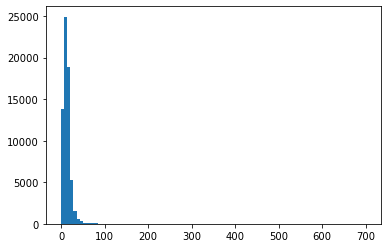

In [25]:
_ = plt.hist(paper_df['title_word_count'], bins= 100)

paper_df['title_word_count'].quantile(0.99)

7370.0

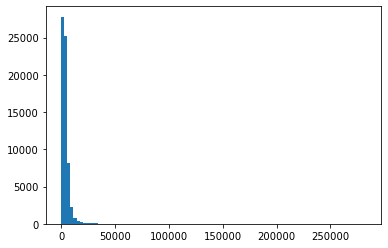

In [26]:
_ = plt.hist(paper_df['body_word_count'], bins= 100)

paper_df['body_word_count'].quantile(0.9)

472.0

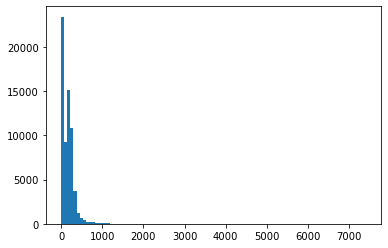

In [27]:
_ = plt.hist(paper_df['abstract_word_count'], bins= 100)

paper_df['abstract_word_count'].quantile(0.97)

In [28]:
paper_df.shape

(65782, 12)

In [29]:
## Drop papers with duplication

    
paper_df.drop_duplicates(['abstract', 'text'], inplace=True)

## drop paper where abstract or length is too long
# use 512 as the maximum length for T5 is 512 and BART is 1024, lose 2.5% papers
# abstract > 30 
trimmed_df = paper_df[(paper_df['abstract_word_count'] > 20) & (paper_df['abstract_word_count'] < 512)]

trimmed_df = trimmed_df[trimmed_df['title_word_count'] < 50]
# arbitry number
# trimmed_df = trimmed_df[(trimmed_df['body_word_count'] >500) &( trimmed_df['body_word_count'] < 4000)]

In [32]:
new_df = trimmed_df.copy()
new_df = new_df.reset_index(drop=True)

In [33]:
new_df.shape

(42769, 12)

### Add Topic Label From LDA classification for training data

In [35]:
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

#### Tokenize abstract string for LDA

In [36]:
new_df['abstract_tokens'] = new_df['abstract'].apply(lambda x: x.split())

#### LDA specific data cleaning

In [37]:
## remove the word 'abstract'
def remove_specific_word(text):
    words = [w for w in text if w != 'abstract']
    return words

In [38]:
new_df['abstract_tokens'] =  new_df['abstract_tokens'].apply(lambda x: remove_specific_word(x))

In [39]:
# remove stop words
def remove_stopwords(list_of_string):
    stop_words = set(stopwords.words('english')) 
    return [w for w in list_of_string if not w in stop_words] 
  

In [40]:
new_df['abstract_tokens'] = new_df['abstract_tokens'].apply(lambda x: remove_stopwords(x))

In [41]:
## remove very short words, like single letter

def remove_short_words(tokens, min_len):
    return [w for w in tokens if len(w)>=min_len] 


In [42]:
new_df['abstract_tokens'] = new_df['abstract_tokens'].apply(lambda x: remove_short_words(x, 2))
  

In [43]:
## lemmatize words

# define a function to lematize a list of tokens
lemmatizer = WordNetLemmatizer() # instantiate a lemmatizer

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return lemmatized_tokens

In [44]:
new_df['abstract_tokens'] = new_df['abstract_tokens'].apply(lambda x: lemmatize_tokens(x)) #lemmatize words

In [870]:
# # define a function that converts a list of tokens into n-grams
# def getNGrams(tokens, n):
#     return [tokens[i : i + n] for i in range(len(tokens) - (n - 1))]

In [871]:
# new_df['abstract_2-grams'] = new_df['abstract_tokens'].apply(lambda x: getNGrams(x, 2))
# new_df.head()

In [872]:
# words = set(nltk.corpus.words.words())

In [873]:
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = CountVectorizer(analyzer = "word",   \
#                              tokenizer = None,    \
#                              preprocessor = None, \
#                              stop_words = 'english',   \
#                              max_features = 2000) 

# ## this makes tokens
# all_tokens = new_df['abstract_tokens'].apply(lambda x: " ".join(x))

# # all_tokens = new_df['abstract'].apply(lambda x: " ".join(x), axis = 0)
# vectorizer.fit(all_tokens)

In [874]:
# x_train = vectorizer.transform(all_tokens)

In [875]:
# x_train = x_train.toarray()

In [876]:
# # Top words in the trianing set
# word_count = pd.DataFrame({'word': vectorizer.get_feature_names(), 'count': np.asarray(x_train.sum(axis=0))})
# word_count.sort_values('count', ascending=False).set_index('word')[:30].sort_values('count', ascending=True).plot(kind='barh')


#### Unigram + bigram LDA modeling

In [47]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import Phrases

In [49]:
LDA_data = new_df['abstract_tokens']

# create bi-gram phrases
bigram = Phrases(LDA_data, min_count=1)

for idx in range(len(LDA_data)):
    for token in bigram[LDA_data[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            LDA_data[idx].append(token)
            

# Reformatting tokens for LDA

## this clean numbers out (this step seems redundant)
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

        
# construct token list
texts = list(sent_to_words(LDA_data))

# create dictionary
dictionary = corpora.Dictionary(texts)

dict(list(dictionary.token2id.items())[0:10])

## create corpus for LDA
corpus = [dictionary.doc2bow(item) for item in texts]

In [50]:
### Search optimal cluster number

In [51]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
#         model = gensim.models.wrappers.LdaMallet(mallet_path, 
#                                                  corpus=corpus,
#                                                  num_topics=num_topics,
#                                                  id2word=id2word)
        
        
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=dictionary,
                                                num_topics=num_topics,
                                                random_state=100,
                                                update_every=1,
                                                chunksize=100,
                                                passes=10,
                                                alpha='auto',
                                                per_word_topics=True)
        
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [52]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=texts, start=2, limit=25, step=1)


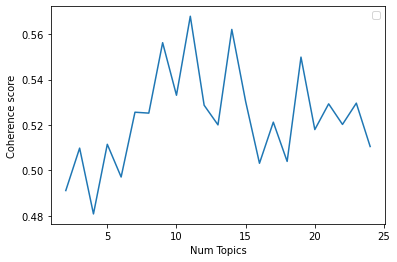

In [56]:
# Show graph 
limit=25; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend((""), loc='best')
plt.show()

## looks like 8 topic is best

In [64]:
## find the maximum coherence score and its in
for i, c in list(zip(range(2, 2+len(coherence_values)), coherence_values)):
    if c == max(coherence_values):
        print((i, c))
        optimal_cluster = i

(11, 0.5678359230945655)


In [65]:
optimal_cluster

11

In [66]:
## do LDA using optimal number of topics
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=dictionary,
                                            num_topics=optimal_cluster,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

In [67]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.



Perplexity:  -10.350781776601094


In [68]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5678359230945655


In [70]:
import pyLDAvis
import pyLDAvis.gensim  
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, R = 50)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.145803 -0.018244       1        1  18.921757
8     -0.122051  0.120709       2        1  18.578337
4     -0.163957 -0.157019       3        1  14.412637
7     -0.125842 -0.061890       4        1  11.790976
9     -0.116173  0.087889       5        1   9.270290
5     -0.024064 -0.250581       6        1   6.896832
2     -0.019431  0.156304       7        1   5.226523
3     -0.049799  0.189780       8        1   5.115705
10     0.168538 -0.153955       9        1   4.662677
0      0.248443  0.091543      10        1   2.919555
6      0.350140 -0.004534      11        1   2.204703, topic_info=          Term          Freq         Total Category  logprob  loglift
62       virus  57310.000000  57310.000000  Default  50.0000  50.0000
399      covid  24828.000000  24828.000000  Default  49.0000  49.0000
690    patient  35293.000000  35293.000000  Default  48.0000  48.0000
449       sars  23712.000000  23712.000000  Default  47.0000  47.0000
398        cov  23088.000000  23088.000000  Default  46.0000  46.0000
...        ...           ...           ...      ...      ...      ...
243         et   2116.615723   3879.395996  Topic11  -4.1531   3.2087
992        met    855.249146   1162.877686  Topic11  -5.0593   3.5073
220         al    680.662903   3099.092041  Topic11  -5.2876   2.2988
2858        au    375.286194    550.677673  Topic11  -5.8830   3.4311
16523  shelter    356.490906    482.605713  Topic11  -5.9344   3.5117

[1050 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
2723       7  0.998254  abdominal
3829       2  0.166559     access
3829       6  0.832793     access
2789       1  0.999510   accuracy
2672       1  0.999254   accurate
...      ...       ...        ...
734        4  0.481294       year
734        7  0.026744       year
15172     11  0.997849       zijn
9211       2  0.999534       zikv
619        5  0.999350   zoonotic

[1743 rows x 3 columns], R=50, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 9, 5, 8, 10, 6, 3, 4, 11, 1, 7])

In [71]:
## show topic and top N key words
for idx, topic in lda_model.show_topics(num_topics= 50, formatted=False, num_words= 20):
    
    print('Topic: {} \nWords: {}'.format(idx, '|'.join([w[0] for w in topic])))

Topic: 0 
Words: activity|drug|anti|compound|antiviral|pedv|effect|mg|plant|al|synthesis|ml|et|inhibitor|concentration|treatment|et_al|ev|inhibited|agent
Topic: 1 
Words: model|based|data|system|method|used|using|new|time|research|use|approach|disease|result|analysis|also|network|information|different|study
Topic: 2 
Words: virus|respiratory|pcr|sample|viral|assay|detection|child|positive|infection|influenza|detected|method|test|time|clinical|real|diagnostic|reaction|result
Topic: 3 
Words: sequence|strain|gene|genome|rna|analysis|rt|genetic|region|two|ibv|sequencing|nucleotide|isolates|variant|isolated|specie|virus|acid|identified
Topic: 4 
Words: health|case|disease|population|outbreak|infection|risk|epidemic|public|rate|country|control|transmission|influenza|study|pandemic|number|measure|spread|community
Topic: 5 
Words: covid|sars|cov|coronavirus|respiratory|syndrome|mers|severe|acute|pandemic|severe_acute|clinical|novel|disease|icu|care|case|patient|middle|caused
Topic: 6 
Words: 

In [72]:
## assign topic to documents
topic_assignments = lda_model.get_document_topics(corpus,minimum_probability=0)

In [73]:
probabilities = [ [entry for entry in doc] for doc in topic_assignments ]

In [74]:
sort_prob = [sorted(x, key = lambda x: x[1], reverse = True) for x in probabilities]

In [75]:
## obtain highest score topic

topic_list = [x[0][0] for x in sort_prob]

In [76]:
## attach the topic cluster number to dataframe

new_df['topic_cluster_number'] = topic_list

In [77]:
new_df['topic_cluster_number'].value_counts()

8     10682
1      9850
4      6074
7      5378
9      3793
2      2169
5      1721
3      1256
10      763
6       602
0       481
Name: topic_cluster_number, dtype: int64

(array([  481.,  9850.,  2169.,  1256.,  6074.,  1721.,   602.,  5378.,
        10682.,  3793.,   763.]),
 array([ 0.        ,  0.90909091,  1.81818182,  2.72727273,  3.63636364,
         4.54545455,  5.45454545,  6.36363636,  7.27272727,  8.18181818,
         9.09090909, 10.        ]),
 <a list of 11 Patch objects>)

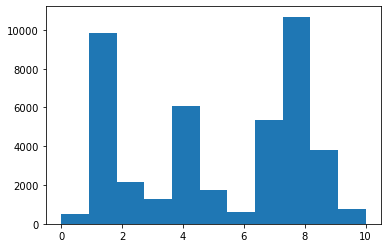

In [79]:
plt.hist(new_df['topic_cluster_number'],bins = 11)

In [99]:
## Train Test Split

In [80]:
test_df = new_df[new_df['title_word_count'] < 4].copy()

In [81]:
# set the erroreous title as empty
test_df['title'] = ''
test_df['title_word_count'] = 0

In [82]:
# train dataset
train_df = new_df.drop(test_df.index).copy()

In [83]:
train_df=train_df.reset_index(drop=True)
test_df=test_df.reset_index(drop=True)

In [89]:
test_df.shape

(2339, 14)

In [85]:
train_df.shape

(40430, 14)

In [86]:
output_path = data_path/ 'cleaned_data'
# os.mkdir(output_path)

test_df.to_csv(output_path / 'test_dataset.csv', index=False)
train_df.to_csv(output_path / 'train_dataset.csv', index=False)

In [95]:
test_df['title'][1]

''

In [94]:
train_df.columns

Index(['paper_id', 'title', 'authors', 'affiliations', 'abstract', 'text',
       'bibliography', 'raw_authors', 'raw_bibliography', 'title_word_count',
       'abstract_word_count', 'body_word_count', 'abstract_tokens',
       'topic_cluster_number'],
      dtype='object')

## Algorithm testing

In [96]:
train_df = pd.read_csv(data_path/ 'cleaned_data' / 'train_dataset.csv')


In [ ]:
# summary = summarizer(clean_df['abstract'][0], min_length=50, max_length=3312)

In [909]:
## BERT
from summarizer import Summarizer

model = Summarizer()
result = model(train_df['abstract'][0], min_length=50,max_length=100)
full0 = ''.join(result)

In [910]:
pprint(full0)

''


In [10]:
#GPT2
from summarizer import Summarizer,TransformerSummarizer

GPT2_model = TransformerSummarizer(transformer_type="GPT2",transformer_model_key="gpt2-medium")
full = ''.join(GPT2_model(train_df['abstract'][0], min_length=50, max_length=100))

In [11]:
pprint(full)

''


In [ ]:
## Bart Text Summarization

#### problem:

#### BART seems working anyway
#### limitation is 1024 words(token)

In [97]:
import torch
from transformers import BartTokenizer, BartForConditionalGeneration
from transformers import pipeline

torch_device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')

summarizer = pipeline(task="summarization", model=model, tokenizer=tokenizer)

In [98]:
# test size of tokens
# input_ids = tokenizer.encode(train_df['abstract'][1], add_special_tokens=True)

## input is too long!
# len(input_ids)

147

In [101]:
full3 = summarizer(train_df['abstract'][2], min_length=4, max_length=50)
print(full3)

[{'summary_text': "Inosine-5'-monophosphate dehydrogenase impdh involved in the synthesis of guanine nucleotides is known to be a potential target to inhibit the replication of viruses. We evaluated antiviral activity of a"}]


train_df['abstract'][0]




In [ ]:
## T5

## T5 limitation is 512 tokens

In [102]:
from transformers import T5Tokenizer, T5ForConditionalGeneration, T5Config

model = T5ForConditionalGeneration.from_pretrained('t5-small')
tokenizer = T5Tokenizer.from_pretrained('t5-small')
device = torch.device('cpu')

text = train_df['abstract'][0]


preprocess_text = text.strip().replace("\n","")
t5_prepared_Text = "summarize: "+preprocess_text
print ("original text preprocessed: \n", preprocess_text)

tokenized_text = tokenizer.encode(t5_prepared_Text, return_tensors="pt").to(device)


# summmarize 
summary_ids = model.generate(tokenized_text,
                            num_beams=4,
                            no_repeat_ngram_size=2,
                            min_length=4,
                            max_length=50,
                            early_stopping=True)

output = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

print ("\n\nSummarized text: \n",output)

original text preprocessed: 
 abstract signaling lymphocyte activation molecule slam is one of the receptors for canine distemper virus cdv in this study canine and feline cells expressing canine slam designated a-72/cslam and crfk/cslam were established for the in vitro study of canine distemper recent cdv isolates kdk-1 and 246 which belong to genotypes asia/h1 and asia/h2 respectively rapidly grew and produced distinct syncytia in both the slam-expressing cells the virus-neutralizing vn test was successfully performed using these cells and the results indicated that sera from dogs experimentally infected with kdk-1 had higher vn titers for homologous strain kdk-1 than for heterologous strain 246 and the vaccine onderstepoort these newly established cells expressing canine slam would help virological and serological analyses of canine distemper #


Summarized text: 
 canine and feline cells expressing canines slam designated a-72. cdv isolates kdk-1 and 246 belong to asia/h1 and h2 r

In [103]:
summarizer = pipeline("summarization", 
                      model="t5-base", 
                      tokenizer="t5-base", 
                      framework="tf")

summarizer(train_df['abstract'][0], min_length=4, max_length=50)


[{'summary_text': 'abstract signaling lymphocyte activation molecule slam is one of the receptors for canine distemper virus cdv in this study canine and feline cells expressing a-72/csl'}]

In [44]:
len(train_df['text'][0].split())

2537